In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np

In [2]:


def rewrite_geant4_csv_header(input_path, output_path):
    with open(input_path, 'r') as infile:
        lines = infile.readlines()

    # Extract column names from metadata
    column_names = []
    data_start_index = 0
    for i, line in enumerate(lines):
        if line.startswith("#column"):
            match = re.match(r"#column\s+\w+\s+(\w+)", line)
            if match:
                column_names.append(match.group(1))
        elif not line.startswith("#"):
            data_start_index = i
            break

    # Write new file with standard header
    with open(output_path, 'w') as outfile:
        outfile.write(",".join(column_names) + "\n")  # new header
        for line in lines[data_start_index:]:
            outfile.write(line)

def Getinfo(f1,f2):
    if(f1!=""):
        rewrite_geant4_csv_header(f1,f2)
    return pd.read_csv(f2)

    


In [3]:
Folder="build"
particle="Test"
isConvert=True
if(isConvert):
    G4Result=Getinfo(f"../{Folder}/out_nt_Geant4Hits_t0.csv", f"Test_Geant4Hits_clean_{particle}.csv")
    OptResult=Getinfo(f"../{Folder}/out_nt_OpticksHits_t0.csv", f"Test_OpticksHits_clean_{particle}.csv")
    PhotonInfo=Getinfo(f"../{Folder}/out_nt_PhotonInfo_t0.csv", f"Test_PhotonInfo_clean_{particle}.csv")
else:
    G4Result=Getinfo("", f"Test_Geant4Hits_clean_{particle}.csv")
    OptResult=Getinfo("", f"Test_OpticksHits_clean_{particle}.csv")
    PhotonInfo=Getinfo("", f"Test_PhotonInfo_clean_{particle}.csv")



In [4]:
lim=100000
Mask=(OptResult["x"] >-lim) & (OptResult["x"] < lim) 
print(len(OptResult['z'][Mask]))
print(len(G4Result['z']))


6434479
6100042


In [5]:
#G4
#evtID,SensorID,SensorName,x,y,z,t,wavelength,ProcessID

#Opticks
#evtID,hit_Id,SensorID,x,y,z,t,wavelength

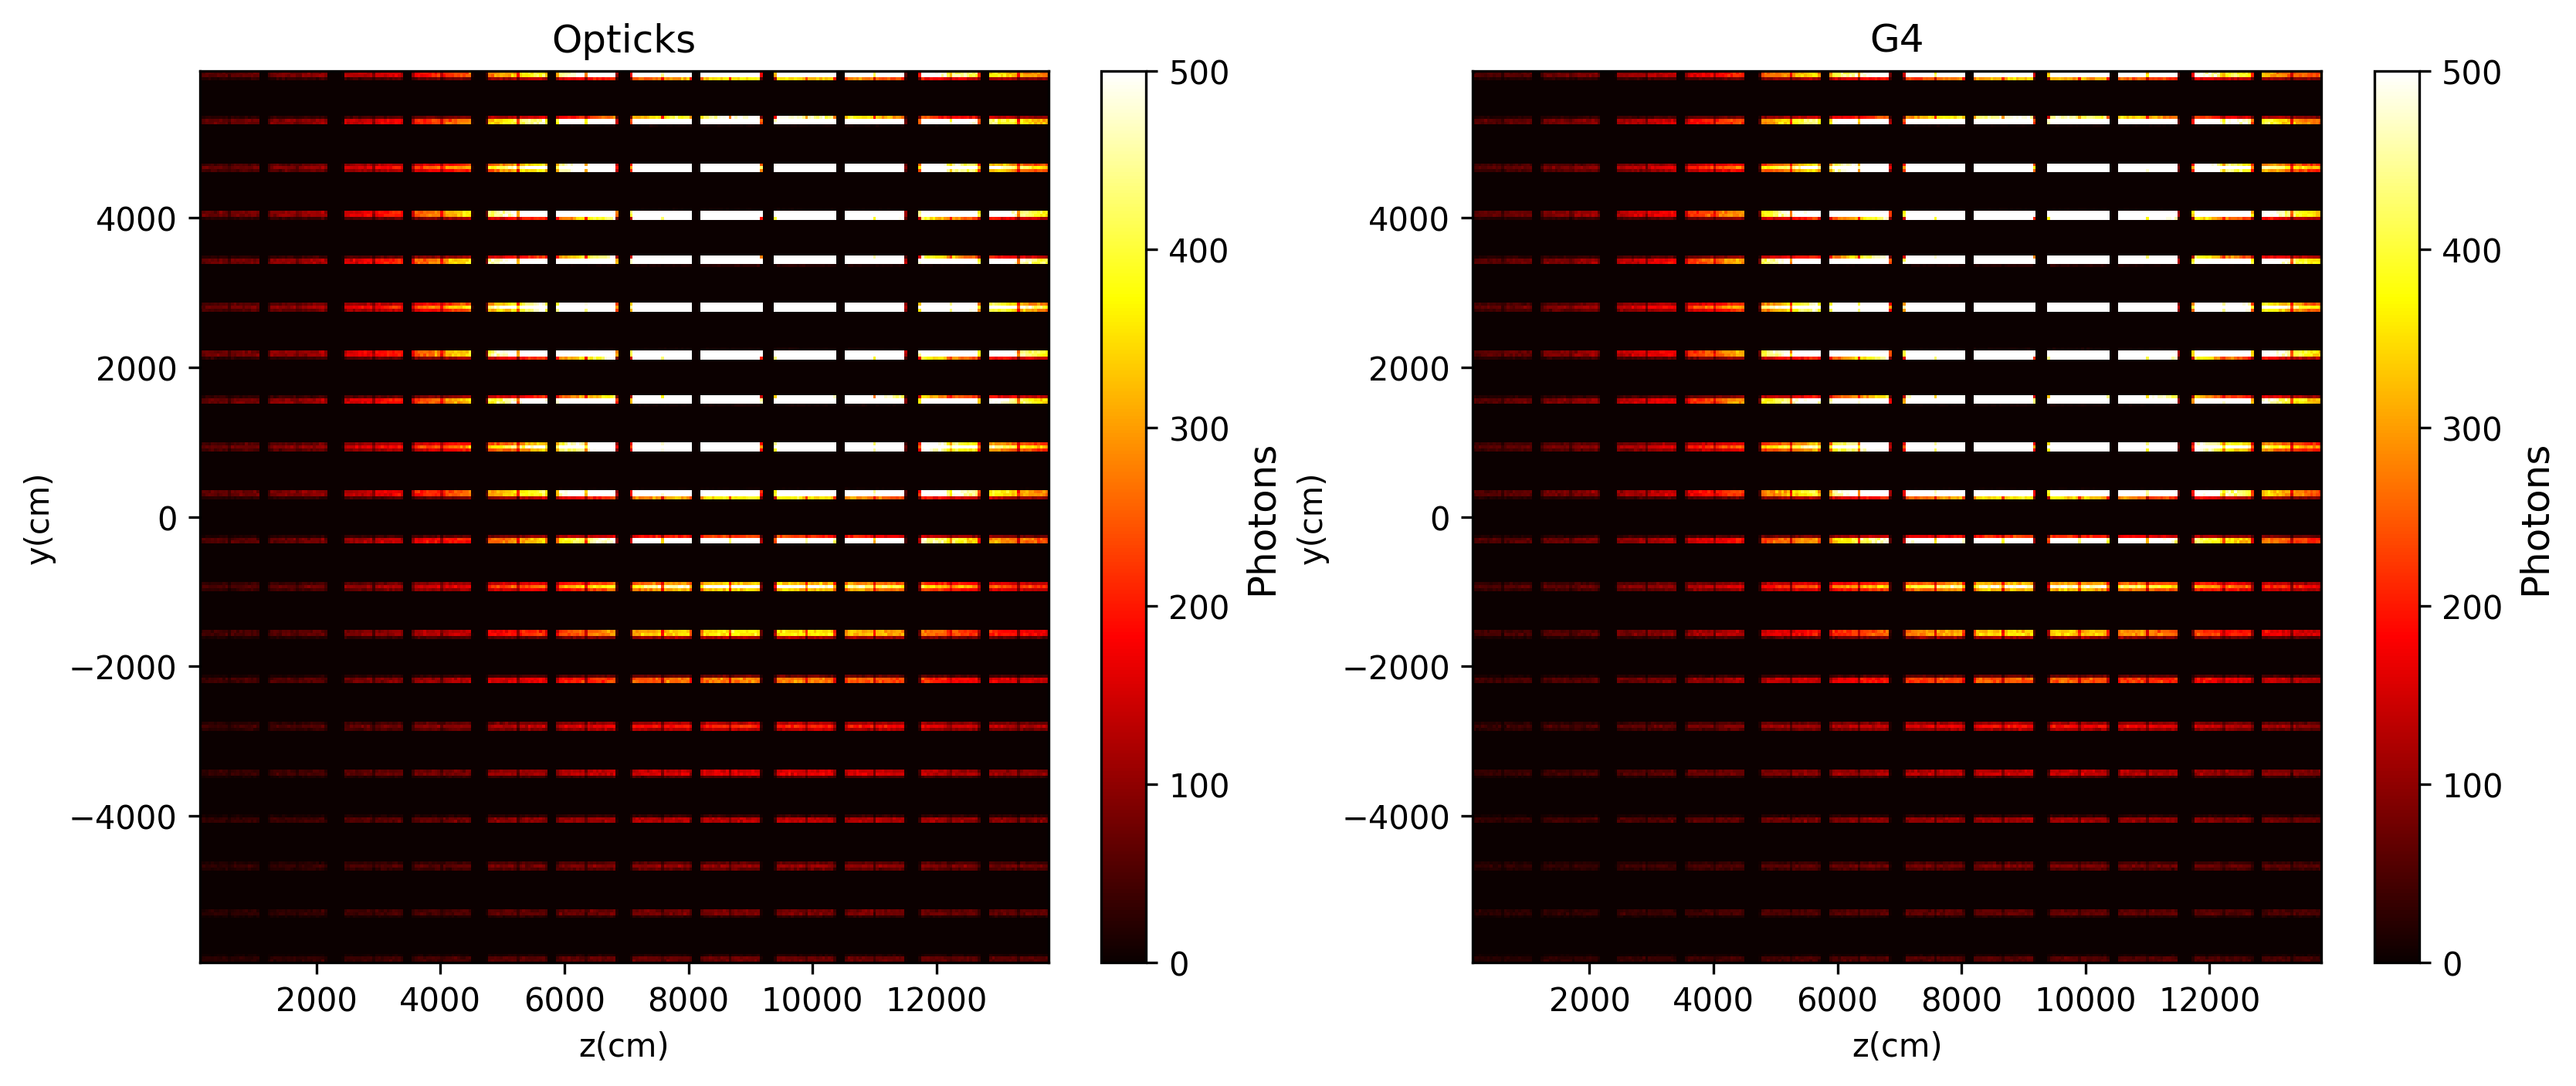

In [15]:
c=500
b=300


fig,p=plt.subplots(1,2,dpi=300,figsize=(13,5))
p[0].set_title("Opticks")
h1=p[0].hist2d(OptResult['z'][Mask],OptResult['y'][Mask],bins=b,cmin=0,cmax=c,cmap="hot",label="Opticks")
cbar1=fig.colorbar(h1[3])
cbar1.set_label("Photons", fontsize=12)
p[1].set_title("G4")
h2=p[1].hist2d(G4Result['z'],G4Result['y'],bins=b,cmin=0,cmax=c,cmap="hot",label="Geant4")
cbar2=fig.colorbar(h2[3])
cbar2.set_label("Photons", fontsize=12)
for i in range(0,2):
    p[i].set_xlabel("z(cm)")
    p[i].set_ylabel("y(cm)")


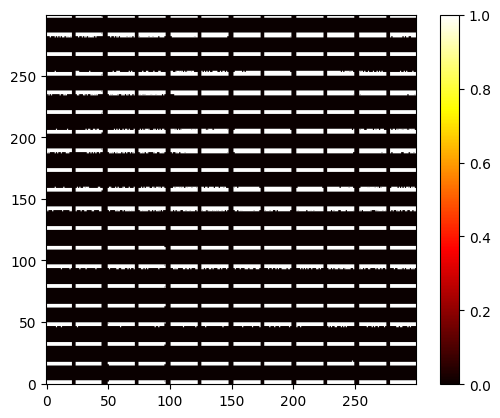

In [7]:
h3=abs(h1[0]-h2[0])
plt.imshow(np.rot90(np.flip(h3,axis=1)),origin="lower",cmap="hot")
plt.colorbar()

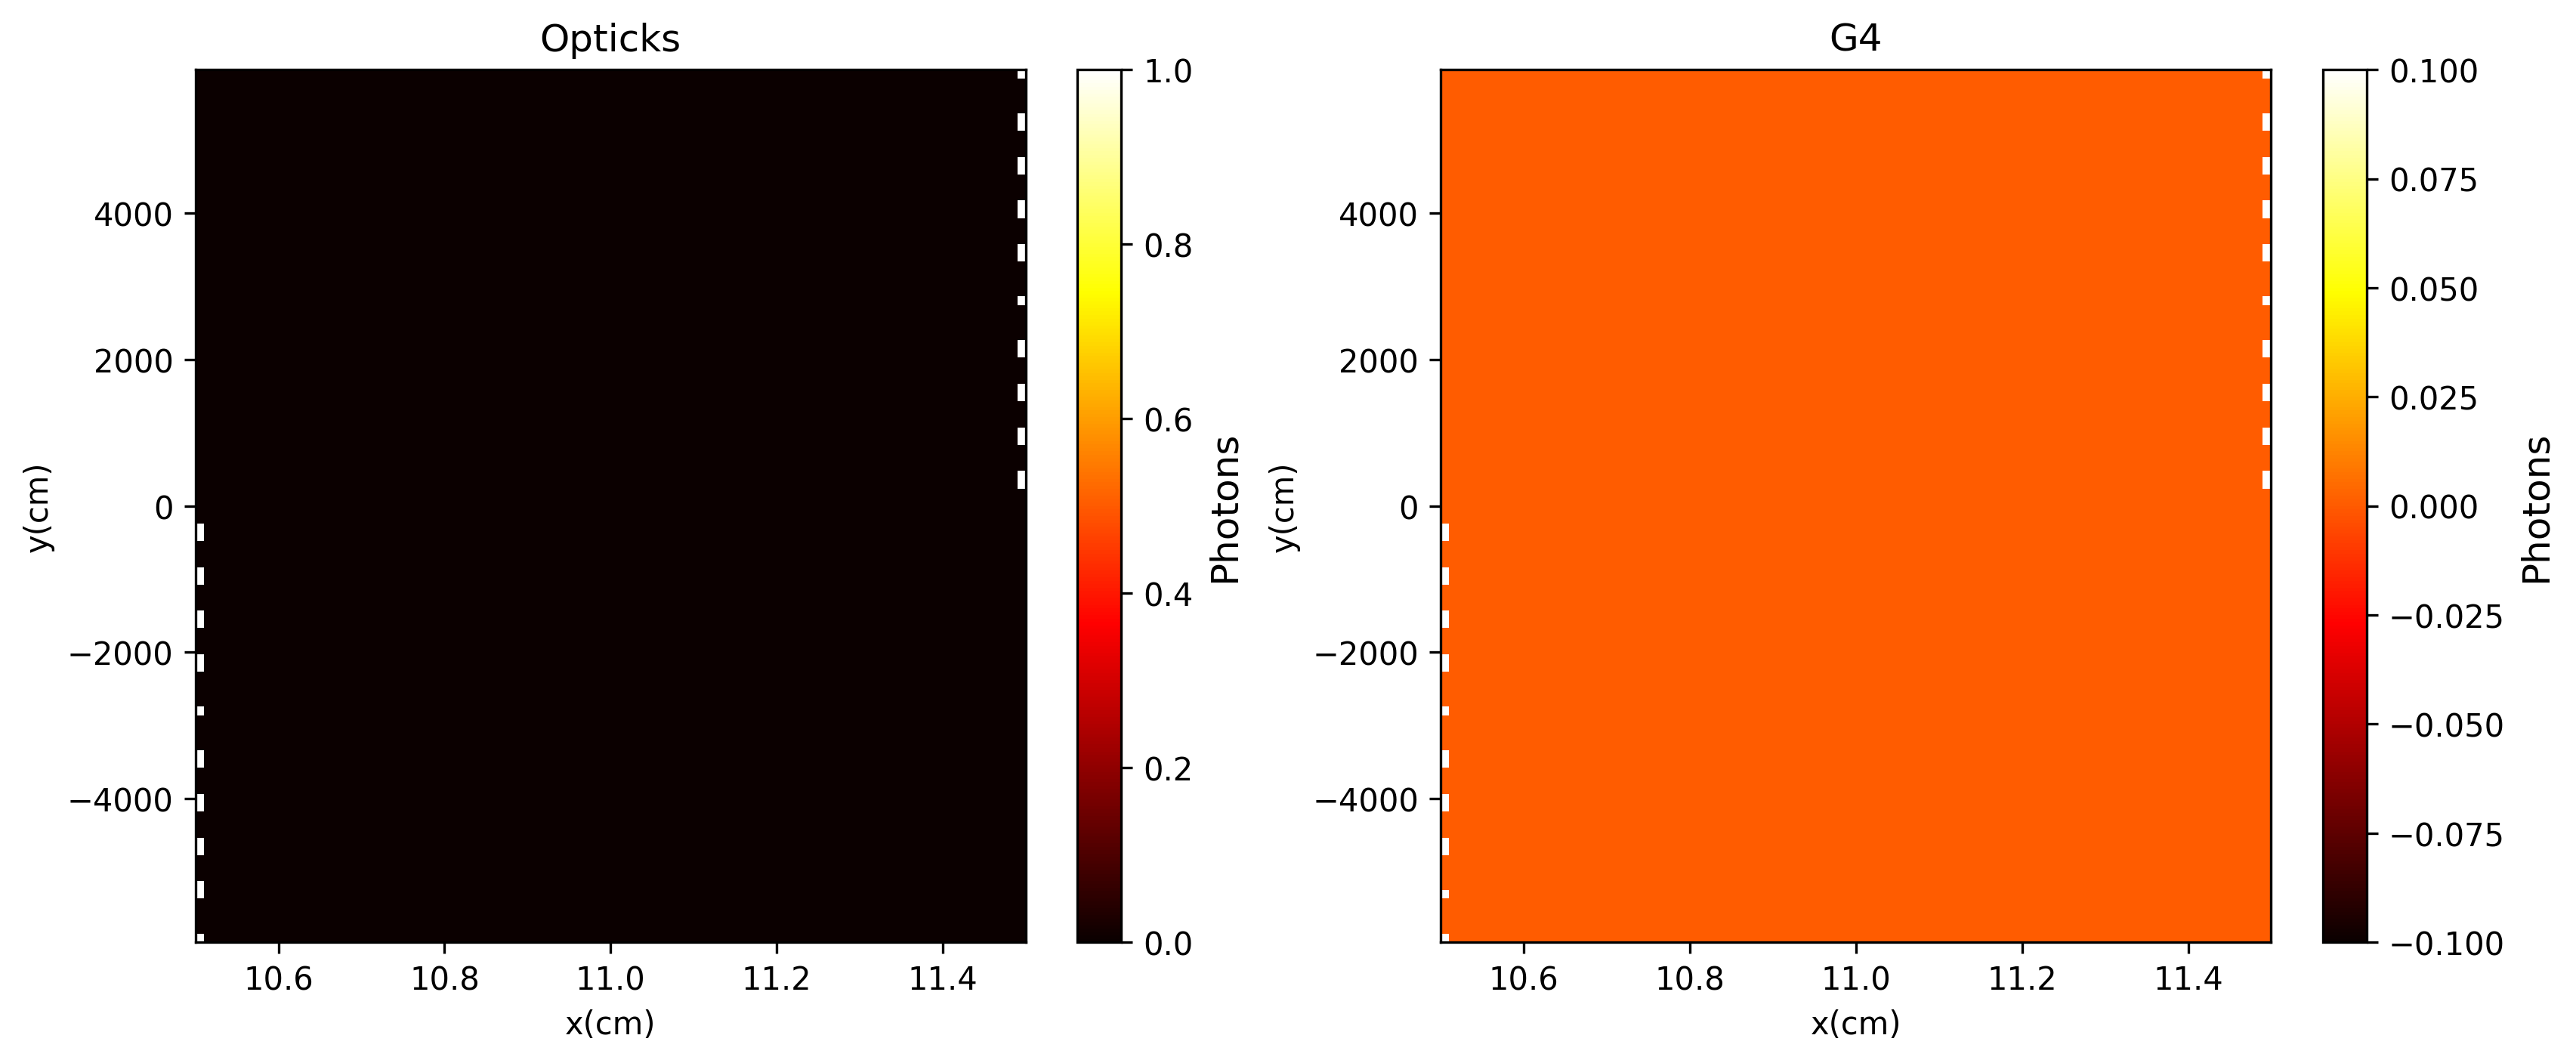

In [8]:
c=1
b=100
fig,p=plt.subplots(1,2,dpi=300,figsize=(13,5))
p[0].set_title("Opticks")
h1=p[0].hist2d(OptResult['x'][Mask],OptResult['y'][Mask],bins=b,cmin=0,cmax=c,cmap="hot",label="Opticks")
#p[0].set_xlim(-100,100)
#p[0].set_xlim(10,12)
cbar1=fig.colorbar(h1[3])
cbar1.set_label("Photons", fontsize=12)
p[1].set_title("G4")
h2=p[1].hist2d(G4Result['x'],G4Result['y'],bins=b,cmin=0,cmax=c,cmap="hot",label="Geant4")
cbar2=fig.colorbar(h2[3])
cbar2.set_label("Photons", fontsize=12)
#plt.xlim(10,12)

for i in range(0,2):
    p[i].set_xlabel("x(cm)")
    p[i].set_ylabel("y(cm)")


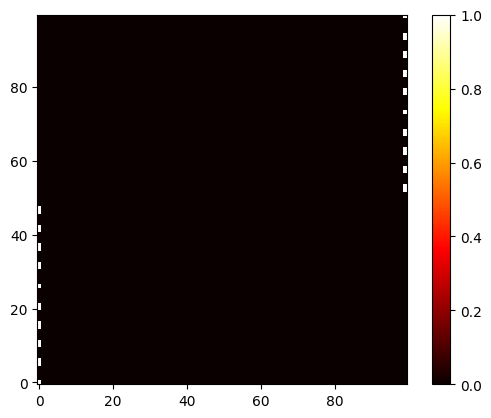

In [9]:
h3=abs(h1[0]-h2[0])
plt.imshow(np.rot90(np.flip(h3,axis=1)),origin="lower",cmap="hot")
plt.colorbar()

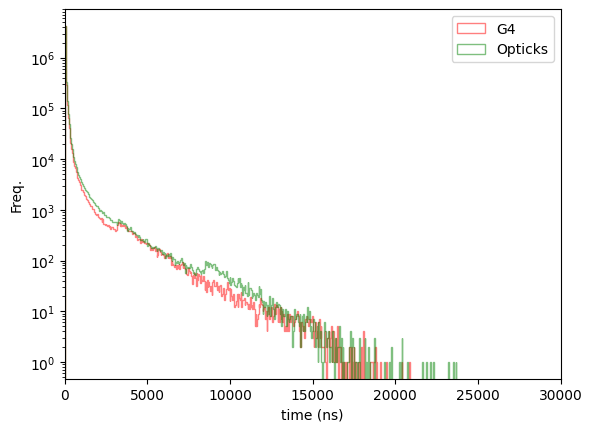

In [19]:
xmax=np.max(np.concatenate([G4Result['t'],OptResult['t']]))
xmin=np.min(np.concatenate([G4Result['t'],OptResult['t']]))
binss=np.linspace(xmin,xmax,500)    

#plt.figure(dpi=300,figsize=(12,5))
plt.hist(G4Result['t'],bins=binss,label="G4",color="red",alpha=0.5,histtype="step")
plt.hist(OptResult['t'],bins=binss,label="Opticks",color="green",alpha=0.5,histtype="step")
plt.semilogy()
plt.xlim(0,3e4)
plt.xlabel("time (ns)")
plt.ylabel("Freq.")

plt.legend()

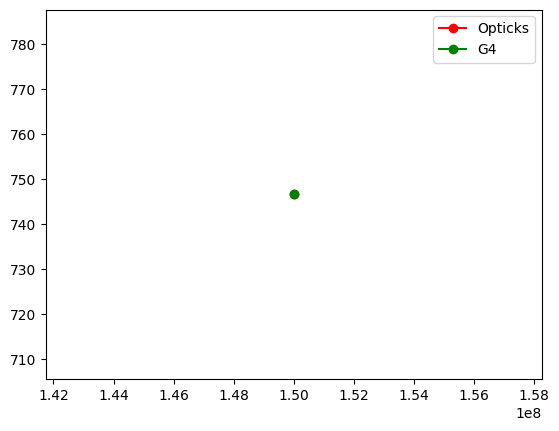

In [21]:
plt.plot(PhotonInfo["OScintPhotons"],PhotonInfo["Time"],color="red",linestyle='-',marker='o',label="Opticks")
plt.plot(PhotonInfo["G4ScintPhotons"],PhotonInfo["Time"],color="green",linestyle='-',marker='o',label="G4")
plt.legend()
plt.show()

In [12]:
print(PhotonInfo)

   G4ScintPhotons  G4CernPhotons  OScintPhotons  OCerenkovPhotons     Time  \
0       150006601              0      150006601                 0  746.514   

   eventID  
0        0  


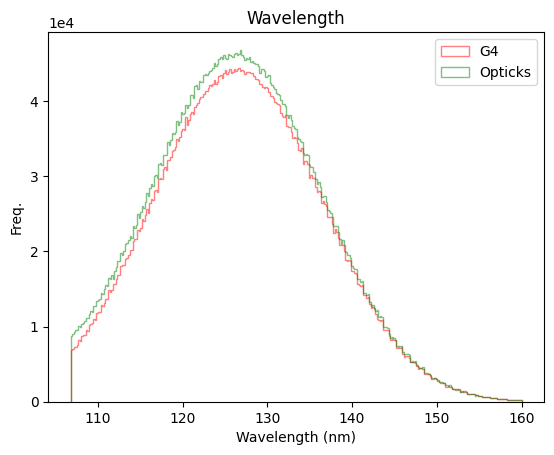

In [23]:
xmax=np.max(np.concatenate([G4Result['wavelength'],OptResult['wavelength']]))
xmin=np.min(np.concatenate([G4Result['wavelength'],OptResult['wavelength']]))
binss=np.linspace(xmin,xmax,300)    
plt.title("Wavelength")
plt.hist(G4Result['wavelength'],bins=binss,label="G4",color="red",alpha=0.5,histtype="step")
plt.hist(OptResult['wavelength'],bins=binss,label="Opticks",color="green",alpha=0.5,histtype="step")
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xlabel("Wavelength (nm)")
plt.ylabel("Freq.")
plt.legend()